/home/shiraishi.t/micromamba/envs/pipeline/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shiraishi.t/micromamba/envs/pipeline/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


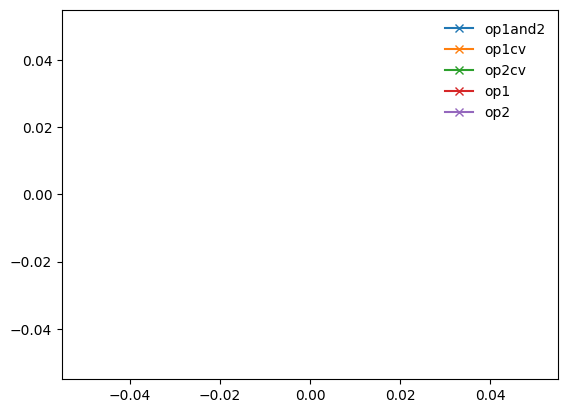

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

op1and2 = []
op1cv = []
op2cv = []
op1 = []
op2 = []

signals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for delta in signals:
    with open(f'results_cv_op1and2/200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    op1and2.append(np.mean(p_list < 0.05))

    with open(f'results_cv_op1/200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    op1cv.append(np.mean(p_list < 0.05))

    with open(f'results_cv_op2/200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    op2cv.append(np.mean(p_list < 0.05))

    with open(f'results_op1/200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    op1.append(np.mean(p_list < 0.05))

    with open(f'results_op2/200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    op2.append(np.mean(p_list < 0.05))

plt.plot(signals, op1and2, label='op1and2', marker="x")
plt.plot(signals, op1cv, label='op1cv', marker="x")
plt.plot(signals, op2cv, label='op2cv', marker="x")
plt.plot(signals, op1, label='op1', marker="x")
plt.plot(signals, op2, label='op2', marker="x")
plt.legend(frameon=False)
plt.show()

# print(kstest(p_list, 'uniform'))
# plt.hist(p_list, bins=20)
# plt.show()

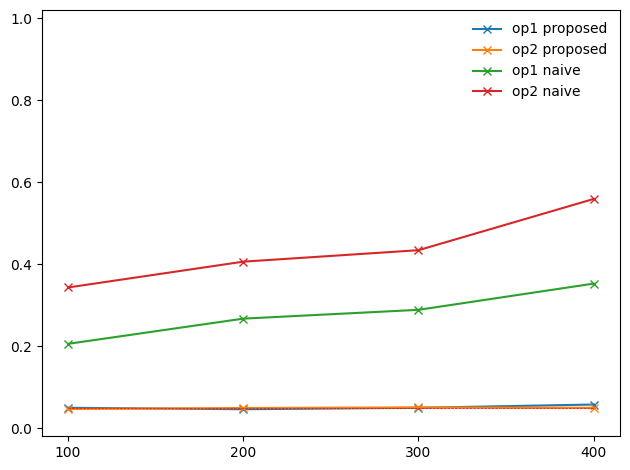

In [22]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

op1 = []
op2 = []
op1naive = []
op2naive = []

ns = [100, 200, 300, 400]
for n in ns:
    with open(f'results_op1/{n}_20_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op1.append(np.mean(p_list < 0.05))
    op1naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

    with open(f'results_op2/{n}_20_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op2.append(np.mean(p_list < 0.05))
    op2naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

plt.plot(ns, op1, label='op1 proposed', marker="x")
plt.plot(ns, op2, label='op2 proposed', marker="x")
plt.plot(ns, op1naive, label='op1 naive', marker="x")
plt.plot(ns, op2naive, label='op2 naive', marker="x")
plt.plot(ns, 0.05 * np.ones(len(ns)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ns)
plt.legend(frameon=False)
plt.show()


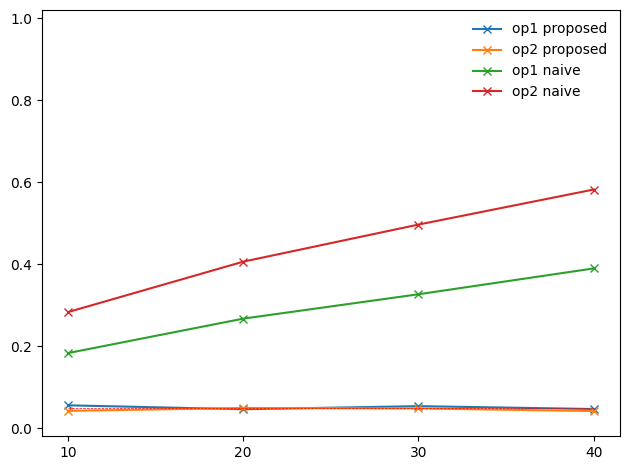

In [24]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

op1 = []
op2 = []
op1naive = []
op2naive = []

ps = [10, 20, 30, 40]
for p in ps:
    with open(f'results_op1/200_{p}_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op1.append(np.mean(p_list < 0.05))
    op1naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

    with open(f'results_op2/200_{p}_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op2.append(np.mean(p_list < 0.05))
    op2naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

plt.plot(ps, op1, label='op1 proposed', marker="x")
plt.plot(ps, op2, label='op2 proposed', marker="x")
plt.plot(ps, op1naive, label='op1 naive', marker="x")
plt.plot(ps, op2naive, label='op2 naive', marker="x")
plt.plot(ps, 0.05 * np.ones(len(ns)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ps)
plt.legend(frameon=False)
plt.show()


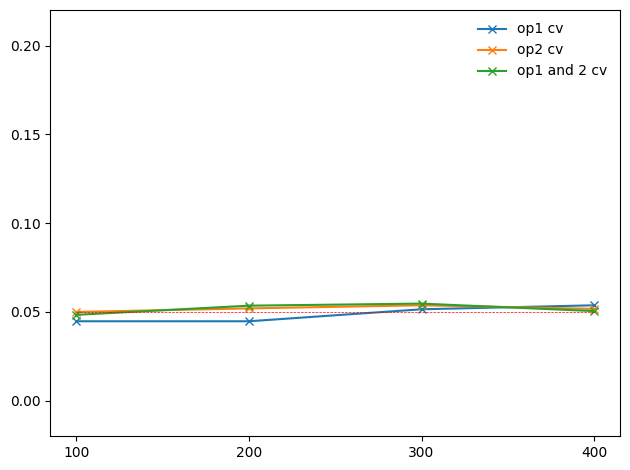

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

op1cv = []
op2cv = []
op1and2 = []

ns = [100, 200, 300, 400]
for n in ns:
    with open(f'results_cv_op1and2/{n}_20_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    op1and2.append(np.mean(p_list < 0.05))

    with open(f'results_cv_op1/{n}_20_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    op1cv.append(np.mean(p_list < 0.05))

    with open(f'results_cv_op2/{n}_20_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    op2cv.append(np.mean(p_list < 0.05))

plt.plot(ns, op1cv, label='op1 cv', marker="x")
plt.plot(ns, op2cv, label='op2 cv', marker="x")
plt.plot(ns, op1and2, label='op1 and 2 cv', marker="x")
plt.plot(ns, 0.05 * np.ones(len(ns)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 0.22)
plt.xticks(ns)
plt.legend(frameon=False)
plt.show()


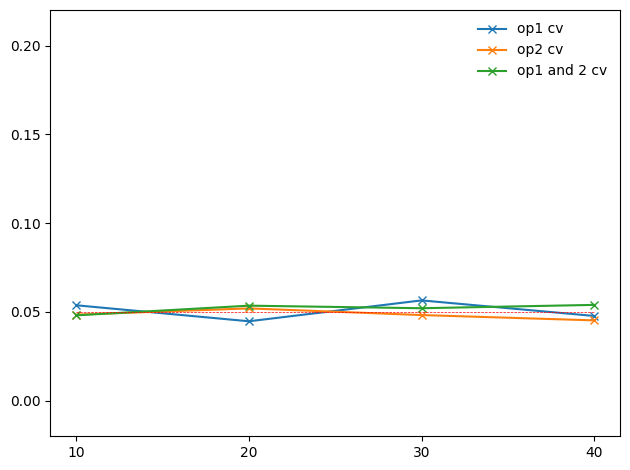

In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

op1cv = []
op2cv = []
op1and2 = []

ps = [10, 20, 30, 40]
for p in ps:
    with open(f'results_cv_op1and2/200_{p}_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    op1and2.append(np.mean(p_list < 0.05))

    with open(f'results_cv_op1/200_{p}_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    op1cv.append(np.mean(p_list < 0.05))

    with open(f'results_cv_op2/200_{p}_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    op2cv.append(np.mean(p_list < 0.05))

plt.plot(ps, op1cv, label='op1 cv', marker="x")
plt.plot(ps, op2cv, label='op2 cv', marker="x")
plt.plot(ps, op1and2, label='op1 and 2 cv', marker="x")
plt.plot(ps, 0.05 * np.ones(len(ps)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 0.22)
plt.xticks(ps)
plt.legend(frameon=False)
plt.show()

0.04105263157894737
KstestResult(statistic=0.026859342051875013, pvalue=0.491173288865529, statistic_location=0.7742277631045066, statistic_sign=-1)
950
SelectiveInferenceResult(stat=-1.7169229515034676, alpha=0.05, p_value=0.6707448090365475, inf_p=0.6707448090365475, sup_p=0.6717409442656318, reject_or_not=False, truncated_intervals=[[-2.355810124377904, -1.5584230605773948]], search_count=368, detect_count=42, selected_model=None, mappings=None)
SelectiveInferenceResult(stat=-0.7323678277129652, alpha=0.05, p_value=0.8464930340673337, inf_p=0.8464930340673337, sup_p=0.847476032413173, reject_or_not=False, truncated_intervals=[[-1.2040887418659687, -0.6640933181302497]], search_count=319, detect_count=20, selected_model=None, mappings=None)


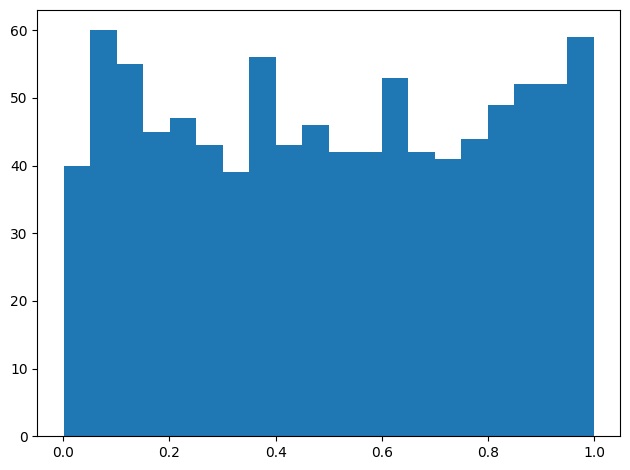

In [12]:
import pickle
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt

with open('results_cv_op1and2/200_10_0.0_0.pkl', 'rb') as f:
    results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    print(np.mean(p_list < 0.05))
    print(kstest(p_list, 'uniform'))
    print(len(p_list))
    plt.hist(p_list, bins=20)
print(results[2])
print(results[3])

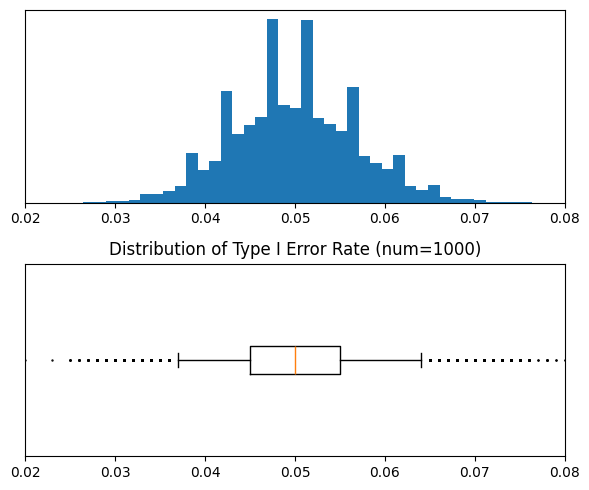

In [96]:
import numpy as np

rng = np.random.default_rng()
values = []
for _ in range(100000):
    v = np.mean(rng.uniform(size=int(num := 1e3)) < 0.05)
    values.append(v)

# plt.boxplot(values)
# plt.show()

# plt.hist(values, bins=100)
# plt.show()

fig, ax = plt.subplots(2, figsize=(6, 5))
plt.title(f'Distribution of Type I Error Rate (num={int(num)})')

ax[0].hist(values, bins=50)
ax[1].boxplot(values, vert=False, whis=(2.5, 97.5), flierprops=dict(ms=0.7))

ax[0].set_yticks([])
ax[1].set_yticks([])
ax[0].set_xlim(0.02, 0.08)
ax[1].set_xlim(0.02, 0.08)


plt.savefig(f'num1e{int(np.log10(num))}.pdf', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()